Data overview:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
inp = pd.read_csv("data/data.csv", sep=',')
ds = pd.read_csv("data/dataCorr/dataCorr.csv", sep=';')


https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

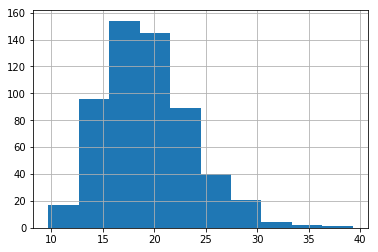

In [3]:
import matplotlib as mpl
%matplotlib inline

#mpl.style.use('default')

#input["radius_mean"].hist()

inp["texture_mean"].hist()

ds.columns


In [4]:
cols = ds.columns

y = ds["diagnosis"]
print(y)

wyw = ["Unnamed: 32", "id", "diagnosis"]

x = inp.drop(wyw, axis=1)

x.columns


0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


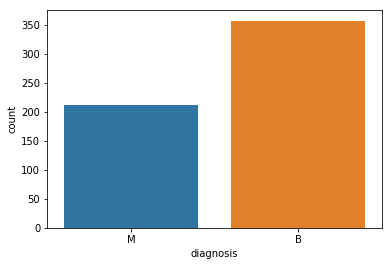

In [6]:
sns.countplot(y, label='count')

In [7]:
M, B = y.value_counts()

In [8]:
[M, B]

[357, 212]

In [9]:
M

357

In [10]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
normalised = (x - x.mean() ) / x.std()

In [12]:
data = pd.concat([y, normalised[:10]], axis = 1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="values")
data

#sns.violinplot(x=)

,diagnosis,features,values
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
5,M,radius_mean,-0.475956
6,M,radius_mean,1.169878
7,M,radius_mean,-0.118413
8,M,radius_mean,-0.319885
9,M,radius_mean,-0.473118


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

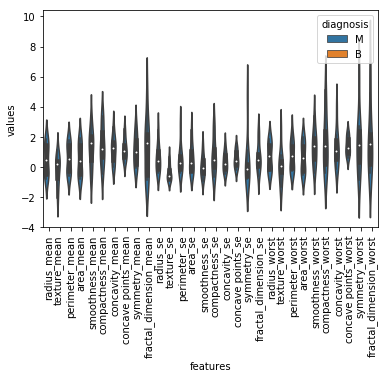

In [14]:
plt.Figure(figsize=(20,20))

sns.violinplot(data=data, x='features', y='values', hue='diagnosis')
plt.xticks(rotation=90)



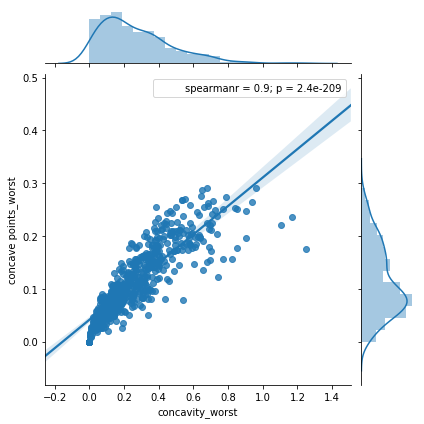

In [15]:
sns.jointplot(x['concavity_worst'], x['concave points_worst'], kind="regg", stat_func=spearmanr) 

Najlepsza rzecz - tabelka z wykresami

In [16]:
x.loc[ : , ['radius_worst','perimeter_worst','area_worst']]

,radius_worst,perimeter_worst,area_worst
0,25.380,184.60,2019.0
1,24.990,158.80,1956.0
2,23.570,152.50,1709.0
3,14.910,98.87,567.7
4,22.540,152.20,1575.0
5,15.470,103.40,741.6
6,22.880,153.20,1606.0
7,17.060,110.60,897.0
8,15.490,106.20,739.3
9,15.090,97.65,711.4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


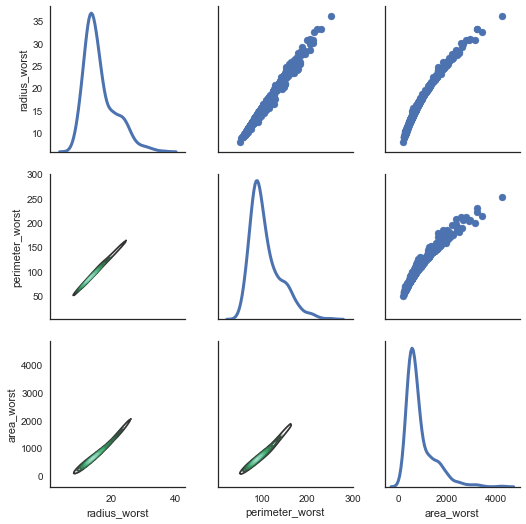

In [17]:
sns.set(style="white")
df = x.loc[ : , ['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# swarm plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

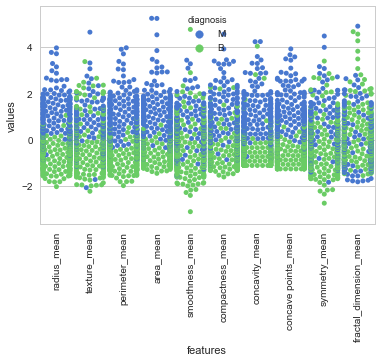

In [26]:
import time

sns.set(style="whitegrid", palette="muted")

adata = x
adatal = y

adata = (adata - adata.mean()) / adata.std()

adata = pd.concat([adatal, adata.iloc[:, 0:10]], axis = 1)
#print(data)

adata = pd.melt(adata, id_vars="diagnosis", var_name='features', value_name='values')

sns.swarmplot(x='features', y='values', hue='diagnosis', data=adata)

plt.xticks(rotation=90)



# heatmapa korelacji kazde z kazdym

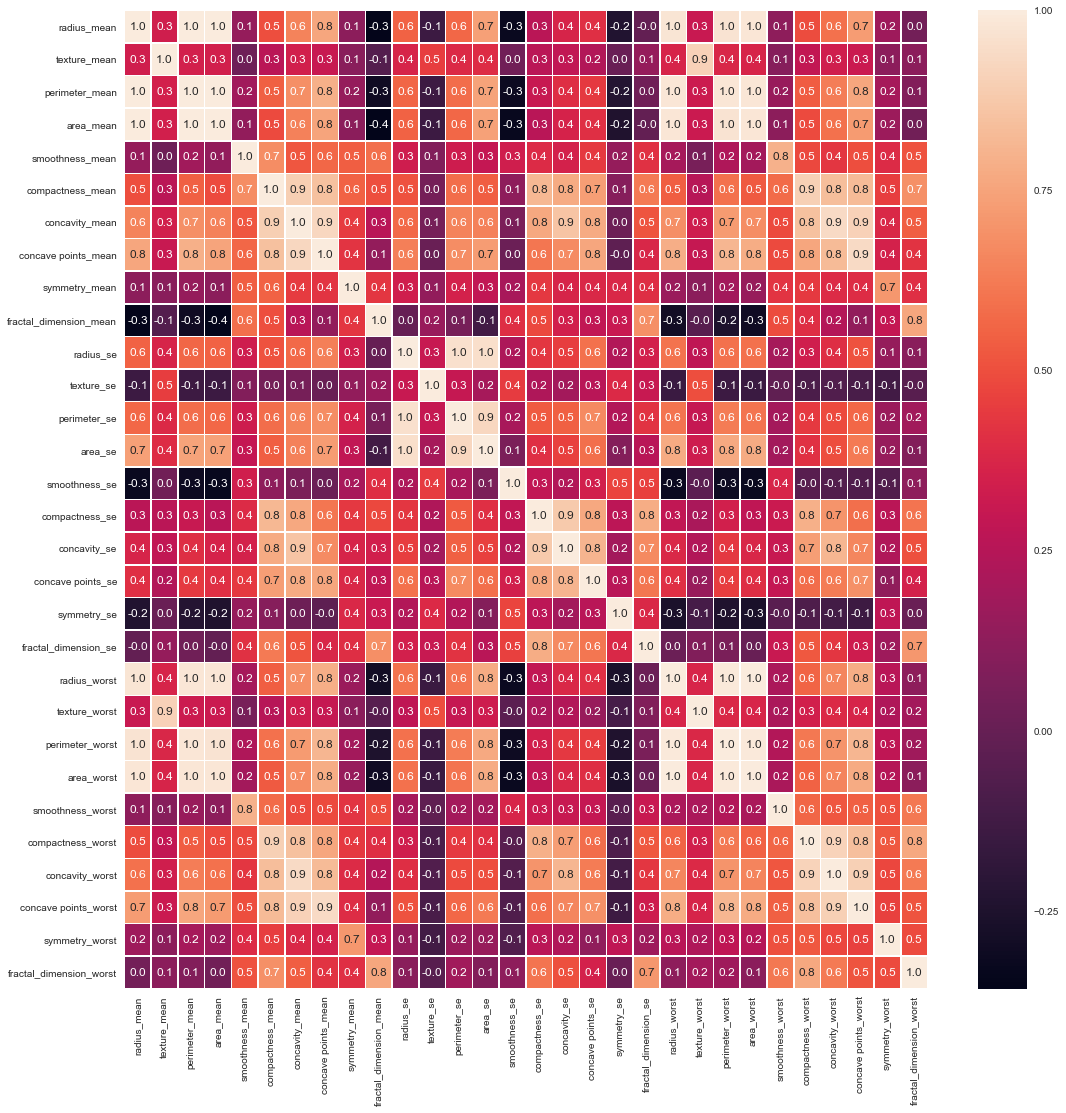

In [32]:
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(method='spearman'), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [33]:
dl1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
xn1 = x.drop(dl1, axis = 1)

xn1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


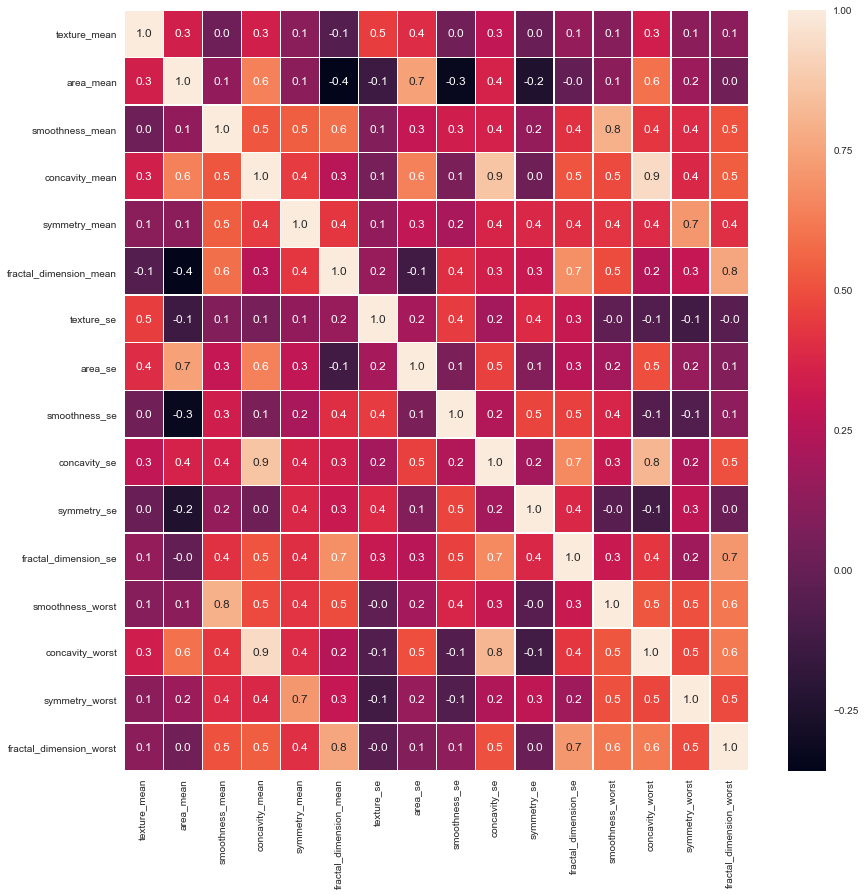

In [36]:
f, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(xn1.corr(method='spearman'), annot=True, linewidths=.5, fmt = '.1f', ax = ax)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

0.953216374269


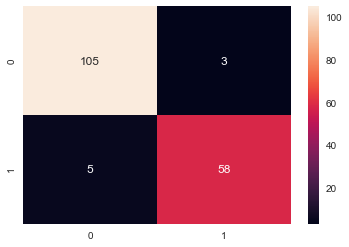

In [44]:
xTrain, xTest, yTrain, yTest = train_test_split(xn1, y, test_size=0.3, random_state = 42)

clas = RandomForestClassifier(random_state=43)
clas = clas.fit(xTrain, yTrain)

ac = accuracy_score(yTest, clas.predict(xTest))

print(ac)

cm = confusion_matrix(yTest, clas.predict(xTest) )
sns.heatmap(cm, annot=True, fmt="d")
                      

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestFeatures = SelectKBest(chi2, k=5).fit(xTrain, yTrain)

In [46]:
bestFeatures.scores_

array([  6.06916433e+01,   3.66899557e+04,   1.00015175e-01,
         1.30547650e+01,   1.95982847e-01,   3.42575072e-04,
         4.07131026e-02,   6.12741067e+03,   1.32470372e-03,
         6.92896719e-01,   1.39557806e-03,   2.65927071e-03,
         2.63226314e-01,   2.58858117e+01,   1.00635138e+00,
         1.23087347e-01])

In [47]:
xTrain.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

sam wybiera ci te ktorych warto uzywac

In [49]:
xTrain2 = bestFeatures.transform(xTrain)
xTest2 = bestFeatures.transform(xTest)

In [59]:
clas2 = RandomForestClassifier()
clas2 = clas2.fit(xTrain2, yTrain)

In [60]:
ac2 = accuracy_score(yTest, clas2.predict(xTest2))

In [61]:
ac2

0.96491228070175439

In [62]:
cm2 = confusion_matrix(yTest, clas2.predict(xTest2))

In [63]:
cm2

array([[105,   3],
       [  3,  60]])

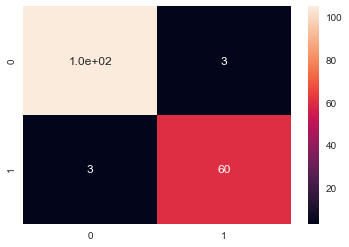

In [64]:
sns.heatmap(cm2, annot=True)

reccursive feature elimination

In [65]:
from sklearn.feature_selection import RFE
cl3 = RandomForestClassifier()

In [66]:
rfe = RFE(cl3, n_features_to_select=5, step=1)

rfe.fit(xTrain, yTrain)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [69]:
xTrain.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [71]:
xTrain.columns[rfe.support_]

Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')

In [72]:
from sklearn.feature_selection import RFECV

In [75]:
clas4 = RandomForestClassifier()

In [81]:
rfcev = RFECV(clas4, cv=5, scoring='accuracy')
rfcev.fit(xTrain, yTrain)

RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [82]:
print(rfcev.n_features_)

16


In [83]:
xTrain.columns[rfcev.support_]

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

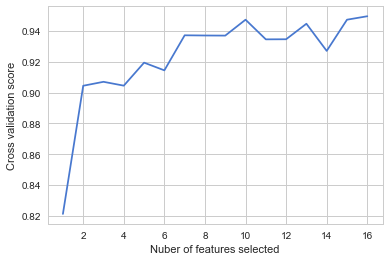

In [85]:
plt.figure()
plt.xlabel("Nuber of features selected")
plt.ylabel("Cross validation score")

plt.plot(range(1, len(rfcev.grid_scores_) + 1), rfcev.grid_scores_)
plt.show()

In [92]:
clas5 = RandomForestClassifier()
clas5.fit(xTrain, yTrain)

imp = clas5.feature_importances_ #pobiera istotnosci z normalnego random tree

std = np.std([tree.feature_importances_ for tree in clas.estimators_], axis=0)

indices = np.argsort(imp)[::-1]

for i in range (xTrain.shape[1]):
    print(i+1, indices[i], imp[indices[i]])

1 7 0.24111296896
2 1 0.181866721378
3 13 0.163785834764
4 3 0.128330542547
5 0 0.0555933356659
6 12 0.0504332731077
7 15 0.0471864470626
8 14 0.0315439443343
9 2 0.0234621337661
10 11 0.0201678995504
11 10 0.0158385195422
12 8 0.0121129549046
13 5 0.0109445486251
14 9 0.00794120213183
15 4 0.00522062170099
16 6 0.00445905195972


<function matplotlib.pyplot.show>

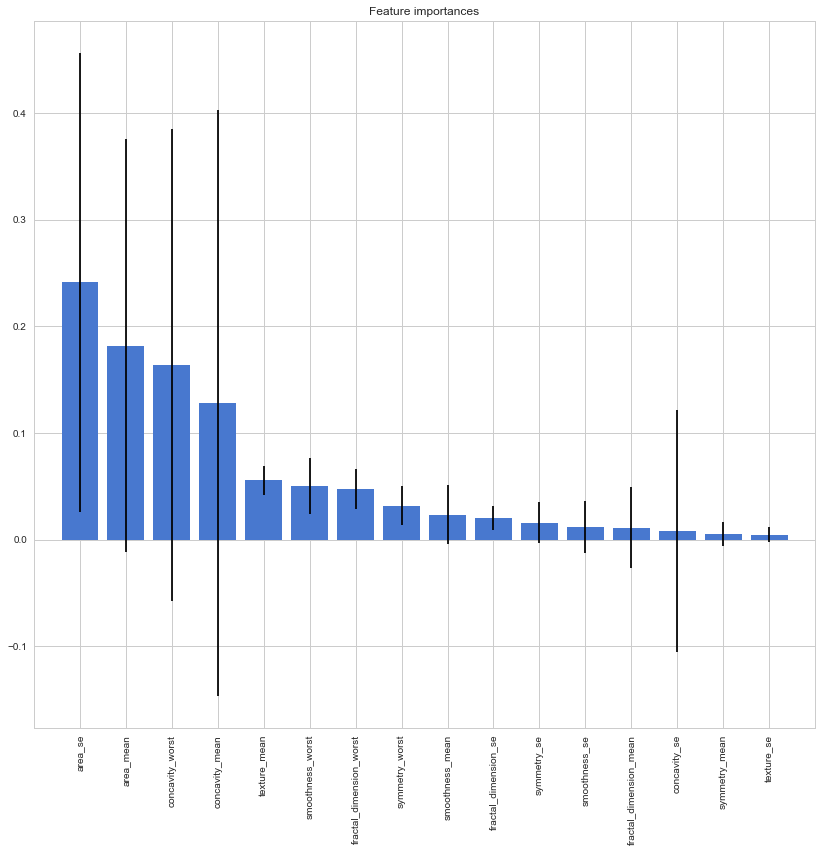

In [96]:
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")

plt.bar(range(xTrain.shape[1]), imp[indices], yerr=std[indices], align="center")

plt.xticks(range(xTrain.shape[1]), xTrain.columns[indices], rotation=90)

plt.xlim([-1, xTrain.shape[1]])

plt.show

In [100]:
print(xTrain.shape[1])

16


# PCA

Text(0,0.5,'explained_variance_ratio_')

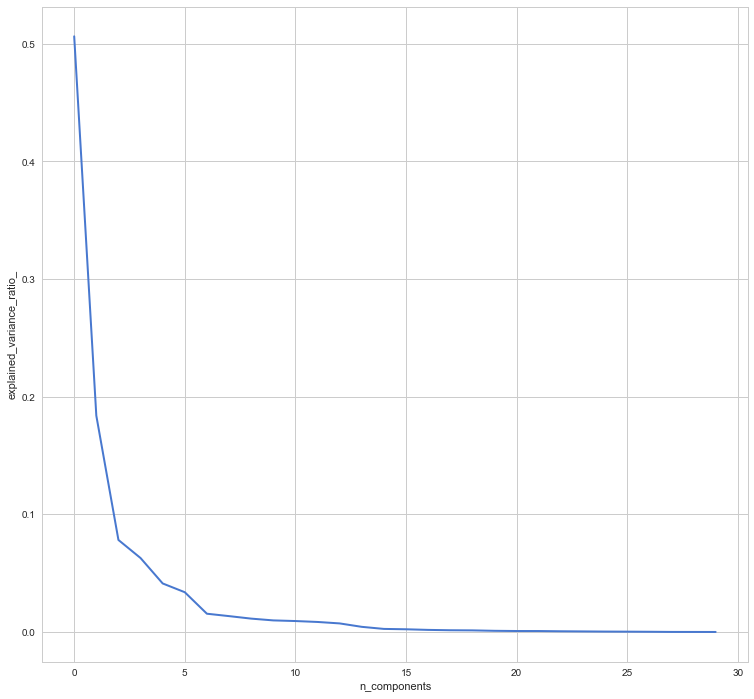

In [101]:
# rozdzielamy na 30 i 70
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

#normalizacja
xTrainN = (xTrain - xTrain.mean() ) / (xTrain.max() - xTrain.min())
xTestN = (xTest - xTest.mean() ) / (xTest.max() - xTest.min())

#!!!!!!!!!!!!!!!!!!!!

from sklearn.decomposition import PCA

pca=PCA()

pca.fit(xTrainN)

plt.figure(1, figsize=(14, 13))

plt.clf()

plt.axes([.2, .2, .7, .7]) #specyfikacja wykres

plt.plot(pca.explained_variance_ratio_, linewidth=2)

plt.axis('tight')

plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

